In [2]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import layers, models

# Define the path to the directory containing gesture folders
gesture_dir = "hand_gestures"

# Get the list of gesture folders
gesture_folders = os.listdir(gesture_dir)

# Load images and labels
X = []
y = []

# Load images from each gesture folder
for folder in gesture_folders:
    folder_path = os.path.join(gesture_dir, folder)
    if os.path.isdir(folder_path):
        for file in os.listdir(folder_path):
            if file.endswith((".jpg", ".jpeg", ".png")):
                image_path = os.path.join(folder_path, file)
                image = cv2.imread(image_path)
                if image is not None:
                    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                    X.append(image)
                    y.append(folder)

# Convert lists to numpy arrays
X = np.array(X)
y = np.array(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Get the corresponding labels for training and testing images
y_train = [folder for folder in y_train]
y_test = [folder for folder in y_test]

# Encode the labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
num_classes = len(label_encoder.classes_)

# Normalize pixel values
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

# Define the model architecture
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(720, 1280, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Display the model summary
model.summary()


C:\Users\AJ\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 718, 1278, 32)       │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 359, 639, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 357, 637, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 178, 318, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 176, 316, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3559424)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │     227,803,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 227,859,780 (869.22 MB)

 Trainable params: 227,859,780 (869.22 MB)

 Non-trainable params: 0 (0.00 B)

In [3]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [4]:
print("Shape of X_train:", X_train.shape)

Shape of X_train: (20, 720, 1280, 3)


In [6]:
history = model.fit(X_train, y_train_encoded, epochs=5, validation_data=(X_test, y_test_encoded))


Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 264s 264s/step - accuracy: 0.2000 - loss: 1.3871 - val_accuracy: 0.1667 - val_loss: 230.6104
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 250s 250s/step - accuracy: 0.3000 - loss: 178.5328 - val_accuracy: 0.1667 - val_loss: 84.9043
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 232s 232s/step - accuracy: 0.3000 - loss: 73.7951 - val_accuracy: 0.1667 - val_loss: 30.8375
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 304s 304s/step - accuracy: 0.3000 - loss: 29.2319 - val_accuracy: 0.3333 - val_loss: 3.9969
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 315s 315s/step - accuracy: 0.5000 - loss: 4.1336 - val_accuracy: 0.6667 - val_loss: 2.5254


In [7]:
test_loss, test_accuracy = model.evaluate(X_test, y_test_encoded)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.6667 - loss: 2.5254
Test Loss: 2.525385618209839
Test Accuracy: 0.6666666865348816


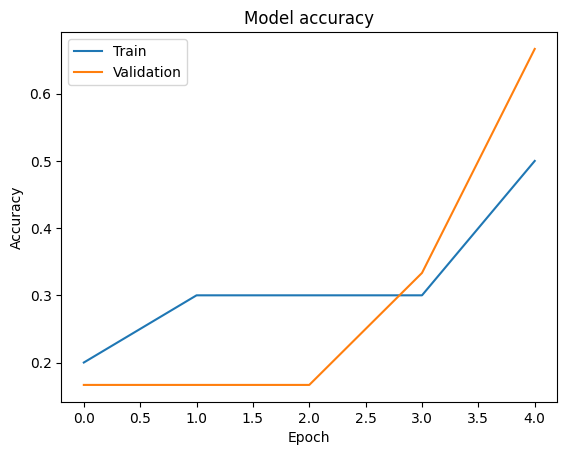

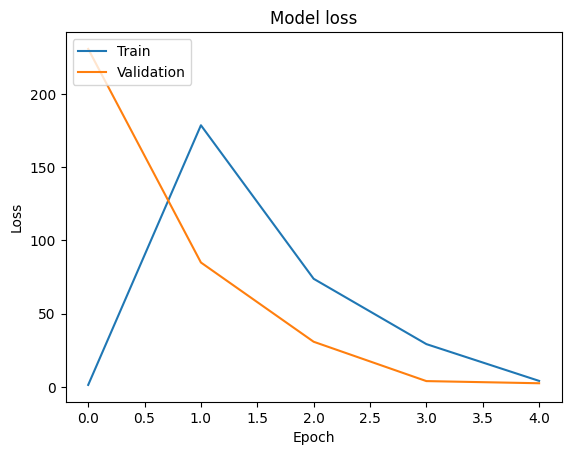

In [9]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [5]:
# Define the complete file path with the .keras extension
model_path = "model/hand_gesture_model.keras"

# Save the model
model.save(model_path)